# Sprawozdanie z MIO laboratorium 05 - Marcin Knapczyk

# Zadanie 1

Proszę pobrać zbiór fasion MNIST (torchvision.datasets.FashionMNIST) i zaproponować sieć konwolucyjną do jego klasyfikacji. Dla co najmniej trzech architektur proszę wypisać macierz pomyłek i wykresy funkcji strat podczas uczenia. Proszę spróbować w każdym wypadku podać przynajmniej jeden źle zaklasyfikowany obrazek.

Fashion-MNIST to zbiór danych obrazów produktów Zalando. Składa się z danych podzielonych na 10 klas reprezentujących różne artykuły odzieżowe.
Każdy przykład jest obrazem w skali szarości 28x28. W każdym wierszu znajduje się 785 kolumn, z których pierwsza zawiera powiązaną etykietę klasy. Pozostałe
784 pola reprezentują wartości jasności pikseli. Wartość piksela jest liczbą całkowitą od 0 do 255, gdzie 255 oznacza czarny piksel.

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.25MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 63.0MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 18.4MB/s]


Device:  cuda

==== Trenowanie modelu: CNN_1 ====
Epoka 1/10, Loss: 0.5990
Epoka 2/10, Loss: 0.3761
Epoka 3/10, Loss: 0.3203
Epoka 4/10, Loss: 0.2913
Epoka 5/10, Loss: 0.2705
Epoka 6/10, Loss: 0.2531
Epoka 7/10, Loss: 0.2384
Epoka 8/10, Loss: 0.2239
Epoka 9/10, Loss: 0.2124
Epoka 10/10, Loss: 0.2001

Macierz pomyłek dla CNN_1:
[[802   2  14  30   7   4 129   0  12   0]
 [  0 977   1  15   2   0   3   0   2   0]
 [ 11   0 826  10  69   0  82   0   2   0]
 [  3   7  13 904  42   0  28   0   3   0]
 [  0   1  41  16 873   0  68   0   1   0]
 [  0   0   0   0   0 978   0  16   0   6]
 [ 84   2  52  37  77   0 739   0   9   0]
 [  0   0   0   0   0  13   0 973   0  14]
 [  1   0   5   5   3   7   5   7 967   0]
 [  1   0   0   0   0  11   0  43   0 945]]
Test accuracy: 89.84%
Training accuracy: 93.31%


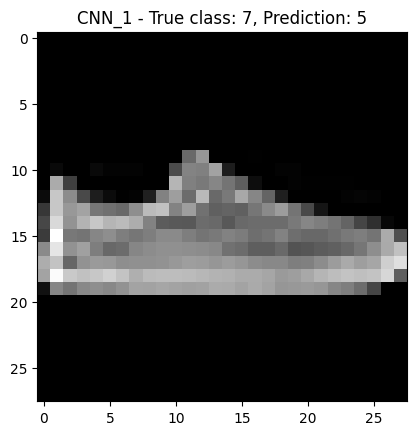


==== Trenowanie modelu: CNN_2 ====
Epoka 1/10, Loss: 0.5522
Epoka 2/10, Loss: 0.4249
Epoka 3/10, Loss: 0.4049
Epoka 4/10, Loss: 0.3899
Epoka 5/10, Loss: 0.3733
Epoka 6/10, Loss: 0.3648
Epoka 7/10, Loss: 0.3647
Epoka 8/10, Loss: 0.3552
Epoka 9/10, Loss: 0.3517
Epoka 10/10, Loss: 0.3490

Macierz pomyłek dla CNN_2:
[[797   0  22  50   7   3 113   0   8   0]
 [  1 965   1  22   4   1   5   0   1   0]
 [  9   1 841  12  71   0  63   0   2   1]
 [  5   5  18 911  26   0  33   0   2   0]
 [  1   0  83  37 813   0  64   0   2   0]
 [  0   0   0   1   0 974   0  15   1   9]
 [102   1  79  38  82   0 683   0  15   0]
 [  0   0   0   0   0  20   0 917   0  63]
 [  0   0   2   5   2   2  10   4 975   0]
 [  0   0   0   0   0   4   1  18   0 977]]
Test accuracy: 88.53%
Training accuracy: 89.93%


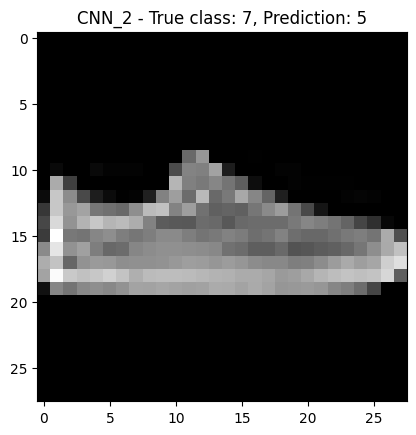


==== Trenowanie modelu: CNN_3 ====
Epoka 1/10, Loss: 0.7514
Epoka 2/10, Loss: 0.4755
Epoka 3/10, Loss: 0.4043
Epoka 4/10, Loss: 0.3671
Epoka 5/10, Loss: 0.3423
Epoka 6/10, Loss: 0.3256
Epoka 7/10, Loss: 0.3085
Epoka 8/10, Loss: 0.2993
Epoka 9/10, Loss: 0.2875
Epoka 10/10, Loss: 0.2774

Macierz pomyłek dla CNN_3:
[[824   0  31  25   7   2  99   0  12   0]
 [  1 972   1  16   4   1   2   0   3   0]
 [ 18   0 857   8  57   2  57   0   1   0]
 [ 11   5  15 879  44   0  38   0   8   0]
 [  0   0  82  23 836   0  56   0   3   0]
 [  0   0   1   0   0 940   0  33   1  25]
 [138   0 100  27 105   0 618   0  11   1]
 [  0   0   0   0   0  16   0 950   0  34]
 [  5   0   5   4   4   5   4   4 967   2]
 [  1   0   0   0   0   6   0  38   0 955]]
Test accuracy: 87.98%
Training accuracy: 90.56%


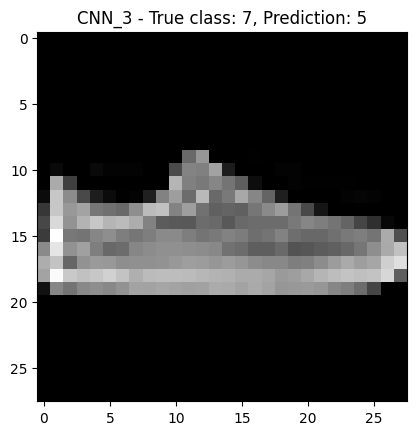

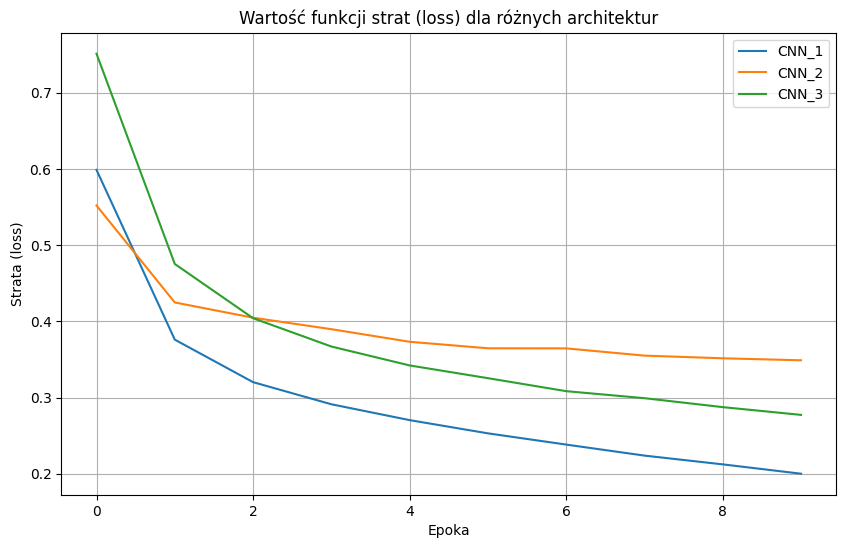

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score


# przygotowanie danych (wraz z normalizacją)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

# dwie warstwy konwolucyjne i trzy fully connected
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# sieć z dropoutem, mniejsza ilość warstw (jedna konwolucyjna i jedna fully connected)
class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(1440, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

# trzy warstwy konwolucyjne, ale mniejsza liczba neuronów w warstwach fully connected
class CNN_3(nn.Module):
    def __init__(self):
        super(CNN_3, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

models = [CNN_1(), CNN_2(), CNN_3()]
model_names = ["CNN_1", "CNN_2", "CNN_3"]
epochs = 10

all_loss_histories = []

for model_idx, model in enumerate(models):
    print(f"\n==== Trenowanie modelu: {model_names[model_idx]} ====")
    model.to(device)
    optimizer = optim.Adam(model.parameters())
    cross_entropy = nn.CrossEntropyLoss()
    loss_history = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for data in train_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Epoka {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    all_loss_histories.append((model_names[model_idx], loss_history))

    # ewaluacja na zbiorze testowym
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # macierz pomyłek
    cm = confusion_matrix(all_labels, all_preds)
    print(f"\nMacierz pomyłek dla {model_names[model_idx]}:")
    print(cm)

    # accuracy na zbiorze testowym
    test_accuracy = accuracy_score(all_labels, all_preds)
    print(f"Test accuracy: {test_accuracy * 100:.2f}%")

    # accuracy na zbiorze uczącym
    train_preds, train_labels = [], []
    with torch.no_grad():
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            train_preds.extend(predicted.cpu().numpy())
            train_labels.extend(labels.cpu().numpy())

    train_accuracy = accuracy_score(train_labels, train_preds)
    print(f"Training accuracy: {train_accuracy * 100:.2f}%")

    # przykład błędnie sklasyfikowanego obrazka
    for i in range(len(all_labels)):
        if all_preds[i] != all_labels[i]:
            img = test_dataset[i][0].squeeze()
            plt.imshow(img, cmap="gray")
            plt.title(f"{model_names[model_idx]} - True class: {all_labels[i]}, Prediction: {all_preds[i]}")
            plt.show()
            break


# wykres funkcji strat dla wszystkich modeli
plt.figure(figsize=(10, 6))
for name, loss_history in all_loss_histories:
    plt.plot(loss_history, label=name)

plt.title("Wartość funkcji strat (loss) dla różnych architektur")
plt.xlabel("Epoka")
plt.ylabel("Strata (loss)")
plt.grid()
plt.legend()
plt.show()


## Wnioski:
* CNN_1
  * Test accuracy: 89.84%, Training accuracy: 93.31%
  *   Sieć CNN_1 najlepiej poradziła sobie z zadaniem
  *   Różnica między wynikiem accuracy dla danych uczących i testujących może sugerować niewielkie przeuczenie
  *   Sieć ta cechyje się najmniejszą wartością straty po 10 epoce
* CNN_2
  * Test accuracy: 88.53%, Training accuracy: 89.93%
  * CNN_2 to sieć o najprostszej strukturze
  * Posiada tylko jedną warstwę konwolucyjną
  * Zawiera warstwę dropout (warstwa ta zeruje niektóre elementy wektora wejściowego w procesie uczenia z prawdopodobieństwem podanym jako argument) zapobiegającą przeuczeniu
  * Wyniki testów pokazują najmniejszą różnicę między accuracy dla danych uczących a testowych, co sugeruje dobrą generalizację
  * Pomimo mniejszych rozmiarów osiąga niewiele gorsze wyniki accuracy od większej sieci
  * Po 10 epoce ma największą wartość funkcji straty
* CNN_3
  * Test accuracy: 87.98%, Training accuracy: 90.56%
  * Sieć o największej ilości warstw
  * Wyniki gorsze niż CNN_1 i CNN_2, co sugeruje, że większa głębokość nie przełożyła się  na lepsze wyniki
  * Problemem może być mała wielkość pierwszej warstwy fully connected (tylko 32 wejścia), co może ograniczać reprezentację obiektu

* Analizując macierze pomyłek można zauważyć, że wszystkie trzy sieci mają problem z rozróżnieniem klasy 5 i 7 (sandal i sneaker), co potwierdzają tez przykłady źle sklasyfikowanych przez sieci artykułów



# Zadanie 2

Dla jednej wybranej architektury, proszę porównać czas uczenia sieci na CPU i na GPU, do czego mogą Państwo wykorzystać własną kartę NVidii lub zasoby Colaba. W Runtime->Change Runtime Type musi być zaznaczona opcja "T4 GPU".

In [ ]:
import time

def train_model_on_device(model_class, device, epochs=5):
    model = model_class().to(device)
    optimizer = optim.Adam(model.parameters())
    cross_entropy = nn.CrossEntropyLoss()

    start_time = time.time()
    model.train()

    for epoch in range(epochs):
        running_loss = 0.0
        for data in train_loader:
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        print(f"[{device}] Epoka {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    end_time = time.time()
    training_time = end_time - start_time
    return training_time


model_class = CNN_1
epochs = 5

print("\n==== Trenowanie na CPU ====")
cpu_time = train_model_on_device(model_class, torch.device("cpu"), epochs=epochs)

if torch.cuda.is_available():
    print("\n==== Trenowanie na GPU ====")
    gpu_time = train_model_on_device(model_class, torch.device("cuda"), epochs=epochs)
else:
    gpu_time = None
    print("GPU niedostępne")

print("\n==== Porównanie czasu trenowania ====")
print(f"Czas trenowania na CPU: {cpu_time:.2f}s")
if gpu_time:
    print(f"Czas trenowania na GPU: {gpu_time:.2f}s")
else:
    print("GPU niedostępne")



==== Trenowanie na CPU ====
[cpu] Epoka 1/5, Loss: 0.5975
[cpu] Epoka 2/5, Loss: 0.3846
[cpu] Epoka 3/5, Loss: 0.3316
[cpu] Epoka 4/5, Loss: 0.3008
[cpu] Epoka 5/5, Loss: 0.2791

==== Trenowanie na GPU ====
[cuda] Epoka 1/5, Loss: 0.6113
[cuda] Epoka 2/5, Loss: 0.3715
[cuda] Epoka 3/5, Loss: 0.3191
[cuda] Epoka 4/5, Loss: 0.2897
[cuda] Epoka 5/5, Loss: 0.2657

==== Porównanie czasu trenowania ====
Czas trenowania na CPU: 117.89s
Czas trenowania na GPU: 74.93s


## Wnioski:
*   Trenowanie przebiega znacznie szybciej na GPU
*   GPU zostały zaprojektowane z myślą o optymalizacji procesu mnożenia macierzy i wektorów (operacje często używane w grafice komputerowej)
*   Użycie karty graficznej do obliczeń pozwala na zaoszczędzenie dużej ilości czasu (w tym przypadku ~36% dla 5 epok), co może być bardzo przydatne przy długim procesie uczenia

# Zadanie 3*

Dla zainteresowanych - proszę doczytać o mechanizmie dropoutu (https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html, https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/) i spróbować zastosować mechanizm dropoutu do stworzonej sieci neuronowej.


==== Trening: model bez dropoutu ====
Epoka 1: Train Accuracy = 0.8299, Test Accuracy = 0.8653
Epoka 2: Train Accuracy = 0.8879, Test Accuracy = 0.8854
Epoka 3: Train Accuracy = 0.9030, Test Accuracy = 0.8869
Epoka 4: Train Accuracy = 0.9121, Test Accuracy = 0.9037
Epoka 5: Train Accuracy = 0.9203, Test Accuracy = 0.9074
Epoka 6: Train Accuracy = 0.9273, Test Accuracy = 0.9080
Epoka 7: Train Accuracy = 0.9346, Test Accuracy = 0.9139
Epoka 8: Train Accuracy = 0.9393, Test Accuracy = 0.9138
Epoka 9: Train Accuracy = 0.9454, Test Accuracy = 0.9144
Epoka 10: Train Accuracy = 0.9501, Test Accuracy = 0.9142

==== Trening: model z dropoutem ====
Epoka 1: Train Accuracy = 0.8057, Test Accuracy = 0.8661
Epoka 2: Train Accuracy = 0.8665, Test Accuracy = 0.8754
Epoka 3: Train Accuracy = 0.8814, Test Accuracy = 0.8904
Epoka 4: Train Accuracy = 0.8938, Test Accuracy = 0.8988
Epoka 5: Train Accuracy = 0.8986, Test Accuracy = 0.9028
Epoka 6: Train Accuracy = 0.9060, Test Accuracy = 0.9086
Epoka 7: T

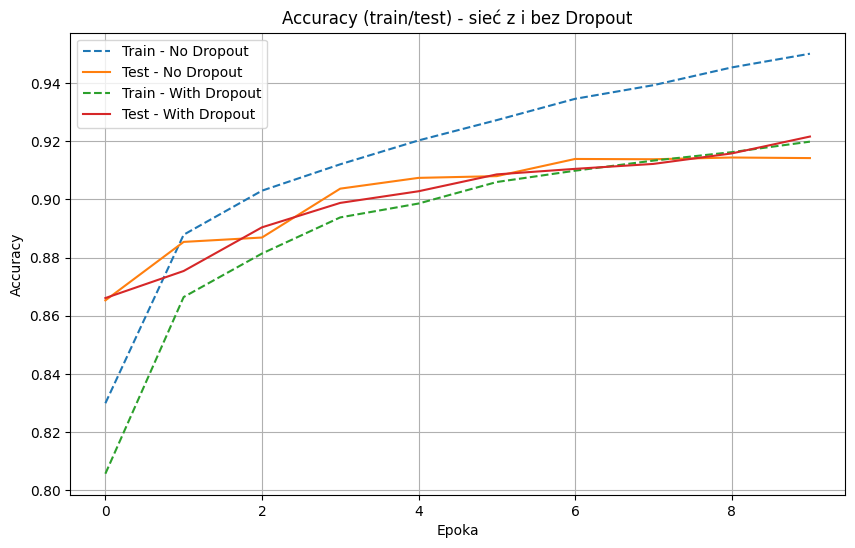


==== Wyniki końcowe ====
Model bez dropoutu: Train Accuracy = 95.01%, Test Accuracy = 91.42%
Model z dropoutem: Train Accuracy = 91.98%, Test Accuracy = 92.16%


In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# sieć bez dropoutu
class CNN_NoDropout(nn.Module):
    def __init__(self):
        super(CNN_NoDropout, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(1568, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# sieć z dropoutem
class CNN_WithDropout(nn.Module):
    def __init__(self):
        super(CNN_WithDropout, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(1568, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)  # dropout na wyjściu warstw konwolucyjnych
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


def train_model(model, epochs=10):
    model.to(device)
    optimizer = optim.Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()

    train_acc_history = []
    test_acc_history = []

    for epoch in range(epochs):
        model.train()
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_accuracy = correct_train / total_train
        train_acc_history.append(train_accuracy)

        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                correct_test += (preds == labels).sum().item()
                total_test += labels.size(0)

        test_accuracy = correct_test / total_test
        test_acc_history.append(test_accuracy)

        print(f"Epoka {epoch+1}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

    return train_acc_history, test_acc_history


model_no_dropout = CNN_NoDropout()
model_with_dropout = CNN_WithDropout()

print("\n==== Trening: model bez dropoutu ====")
train_no_dropout, test_no_dropout = train_model(model_no_dropout)

print("\n==== Trening: model z dropoutem ====")
train_with_dropout, test_with_dropout = train_model(model_with_dropout)


plt.figure(figsize=(10, 6))
plt.plot(train_no_dropout, label="Train - No Dropout", linestyle='--')
plt.plot(test_no_dropout, label="Test - No Dropout")

plt.plot(train_with_dropout, label="Train - With Dropout", linestyle='--')
plt.plot(test_with_dropout, label="Test - With Dropout")

plt.title("Accuracy (train/test) - sieć z i bez Dropout")
plt.xlabel("Epoka")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


print("\n==== Wyniki końcowe ====")
print(f"Model bez dropoutu: Train Accuracy = {train_no_dropout[-1]*100:.2f}%, Test Accuracy = {test_no_dropout[-1]*100:.2f}%")
print(f"Model z dropoutem: Train Accuracy = {train_with_dropout[-1]*100:.2f}%, Test Accuracy = {test_with_dropout[-1]*100:.2f}%")


## Wnioski
* Warstwa Dropout ma na celu ograniczenie ryzyka wystąpienia zjawiska przeuczenia
* Zeruje niektóre elementy wektora wejściowego w procesie uczenia z prawdopodobieństwem podanym jako argument
* Jak widać, sieć bez dropoutu osiągnęła wyższe accuracy dla danych uczących niż dla danych testowych, a wynik dla danych testowych zaczął powoli spadać, co świadczy o przeuczeniu sieci
* Sieć z dropoutem osiągnęła wyższe accuracy dla danych testowych niż uczących, a wyniki testowe nie zaczęły spadać i są wyższe niż w przypadku sieci bez dropoutu
* Mechanizm dropout zadziałał prawidłowo, pozwolił skutecznie zapobiec wystąpieniu przeuczenia sieci

In [ ]:
!jupyter nbconvert --to html /content/MIO_lab05_report.ipynb

[NbConvertApp] Converting notebook /content/MIO_lab05_report.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 541550 bytes to /content/MIO_lab05_report.html
